# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:

########### Daten laden ########### time flipped

XPMT= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PMT_160_120k_Files_gn_tf.pickle","rb"))
XLAPPD1=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_Pure_LAPPD(1x1)_timeflipped_120k_Files.pickle","rb"))
XLAPPD5=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_Pure_LAPPD(15x40)_Timeflipped_120k_Files.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PMT_160_120k_Files_gn_tf.pickle","rb"))
XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/MRD_new.npy")


In [3]:
XPMT.shape,XLAPPD1.shape,XLAPPD5.shape,Y.shape,XMRD.shape

((120005, 10, 16, 2),
 (120005, 3, 8, 2),
 (120005, 15, 40, 2),
 (120005, 2),
 (120005, 6))

In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])



[59977 60028]
[[0 1]
 [1 0]]
50.021249114620225


## 120 k files

In [4]:
training_data = list(zip(XPMT, Y,XMRD,XLAPPD1,XLAPPD5))

random.shuffle(training_data)

X1 =[]
XL11=[]
XL51=[]
Y1 =[]
XMRD1=[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    XMRD1.append(x[2])
    XL11.append(x[3])
    XL51.append(x[4])
    
XTrainingPMT = np.array(X1)
YTraining = np.array(Y1)
XMRDTraing= np.array(XMRD1)
XTrainingLAPPD1 = np.array(XL11)
XTrainingLAPPD5 = np.array(XL51)


X2 =[]
XL12=[]
XL52=[]
Y2 =[]
XMRD2=[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    XMRD2.append(x[2])
    XL12.append(x[3])
    XL52.append(x[4])
    
    
XVal = np.array(X2)
YVal = np.array(Y2)
XMRDVal=np.array(XMRD2)
XValLAPPD1 = np.array(XL12)
XValLAPPD5 = np.array(XL52)

X3 =[]
XL13=[]
XL53=[]
Y3 =[]
XMRD3=[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    XMRD3.append(x[2])
    XL13.append(x[3])
    XL53.append(x[4])
    
XTest = np.array(X3)
YTest = np.array(Y3)
XMRDTest=np.array(XMRD3)
XTestLAPPD1 = np.array(XL13)
YTestLAPPD5 = np.array(XL53)

#print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3,XMRD3,XMRD2,XMRD1

NameError: name 'X' is not defined

In [5]:
XMRDTraing.shape,XMRDVal.shape,XMRDTest.shape

((85000, 6), (20000, 6), (15005, 6))

In [6]:
XTest.shape,XMRDTest.shape

((15005, 10, 16, 2), (15005, 6))

# Testen der besten Methode

In [27]:
XTraining.shape[1:]

(10, 24, 2)

In [11]:


NAME ="PMT+LAPPD5x5_seperated_small"

tensorboard = TensorBoard(log_dir = 'logs\Final\{}'.format(NAME))


inputPMT = tf.keras.Input(shape=XTrainingPMT.shape[1:], name='PMT')
inputLAPPD5 = tf.keras.Input(shape=XTrainingLAPPD5.shape[1:], name='LAPPD5')
#inputMRD = tf.keras.Input(shape=(6), name='MRD')


x = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(inputPMT)
x = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)

x= layers.Dense(512, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)


x = layers.Dense(32, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
xP = layers.Dropout(0.2)(x)


#mrd = layers.Dense(6, activation='sigmoid')(inputMRD)
#mrd =layers.Flatten()(mrd)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(inputLAPPD5)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)

xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)

xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)



xL = layers.Flatten()(xL)

xL = layers.Dense(32, activation='sigmoid')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)




x = layers.concatenate([xP, xL]) #38




x= layers.Dense(100, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)


outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputPMT, inputLAPPD5], outputs=[outputs], name='Model')
model.summary()




Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PMT (InputLayer)                [(None, 10, 16, 2)]  0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 10, 16, 130)  6630        PMT[0][0]                        
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 10, 16, 130)  422630      conv2d_29[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 5, 8, 130)    0           conv2d_30[0][0]                  
______________________________________________________________________________________________

In [12]:


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="API-PMT+LAPPD_tf_5x5-improvement_small-val-acc_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model Fit


Train on 85000 samples, validate on 20000 samples
Epoch 1/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.4124 - acc: 0.8169
Epoch 00001: val_acc improved from -inf to 0.83160, saving model to API-PMT+LAPPD_tf_5x5-improvement_small-val-acc_0.83.model
85000/85000 [==============================] - 35s 414us/sample - loss: 0.4119 - acc: 0.8171 - val_loss: 0.3471 - val_acc: 0.8316
Epoch 2/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.2806 - acc: 0.8792
Epoch 00002: val_acc did not improve from 0.83160
85000/85000 [==============================] - 30s 350us/sample - loss: 0.2804 - acc: 0.8792 - val_loss: 0.3665 - val_acc: 0.8225
Epoch 3/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.2400 - acc: 0.8992
Epoch 00003: val_acc did not improve from 0.83160
85000/85000 [==============================] - 30s 351us/sample - loss: 0.2400 - acc: 0.8992 - val_loss: 0.4502 - val_acc: 0.8188
Epoch 4/80
84800/85000 [=========================

84900/85000 [============================>.] - ETA: 0s - loss: 0.1057 - acc: 0.9600
Epoch 00029: val_acc did not improve from 0.92490
85000/85000 [==============================] - 29s 341us/sample - loss: 0.1057 - acc: 0.9600 - val_loss: 0.3083 - val_acc: 0.9003
Epoch 30/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1040 - acc: 0.9592
Epoch 00030: val_acc did not improve from 0.92490
85000/85000 [==============================] - 29s 340us/sample - loss: 0.1039 - acc: 0.9592 - val_loss: 0.2233 - val_acc: 0.9223
Epoch 31/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1009 - acc: 0.9617
Epoch 00031: val_acc improved from 0.92490 to 0.92950, saving model to API-PMT+LAPPD_tf_5x5-improvement_small-val-acc_0.93.model
85000/85000 [==============================] - 29s 341us/sample - loss: 0.1008 - acc: 0.9617 - val_loss: 0.1981 - val_acc: 0.9295
Epoch 32/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9637
Epoch 000

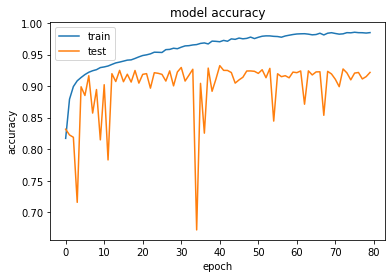

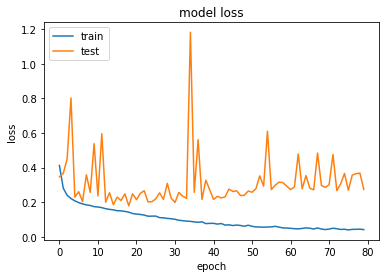

Ende des Versuchs: 


In [13]:

history = model.fit([XTrainingPMT,XTrainingLAPPD5],
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=([XVal,XValLAPPD5],YVal),
                    epochs= 80,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [16]:
model = tf.keras.models.load_model("API-PMT+LAPPD_tf_5x5-improvement-val-acc_0.94.model")

In [17]:
score = model.evaluate([XTest,YTestLAPPD5], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.1619715330601533
Test accuracy:  0.93428856


In [19]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTest,YTestLAPPD5], batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6755  740]
 [ 246 7264]]


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.90126751 0.09873249]
 [0.03275632 0.96724368]]


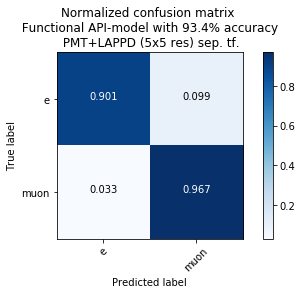

In [21]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Functional API-model with 93.4% accuracy \n PMT+LAPPD (5x5 res) sep. tf.')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [22]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


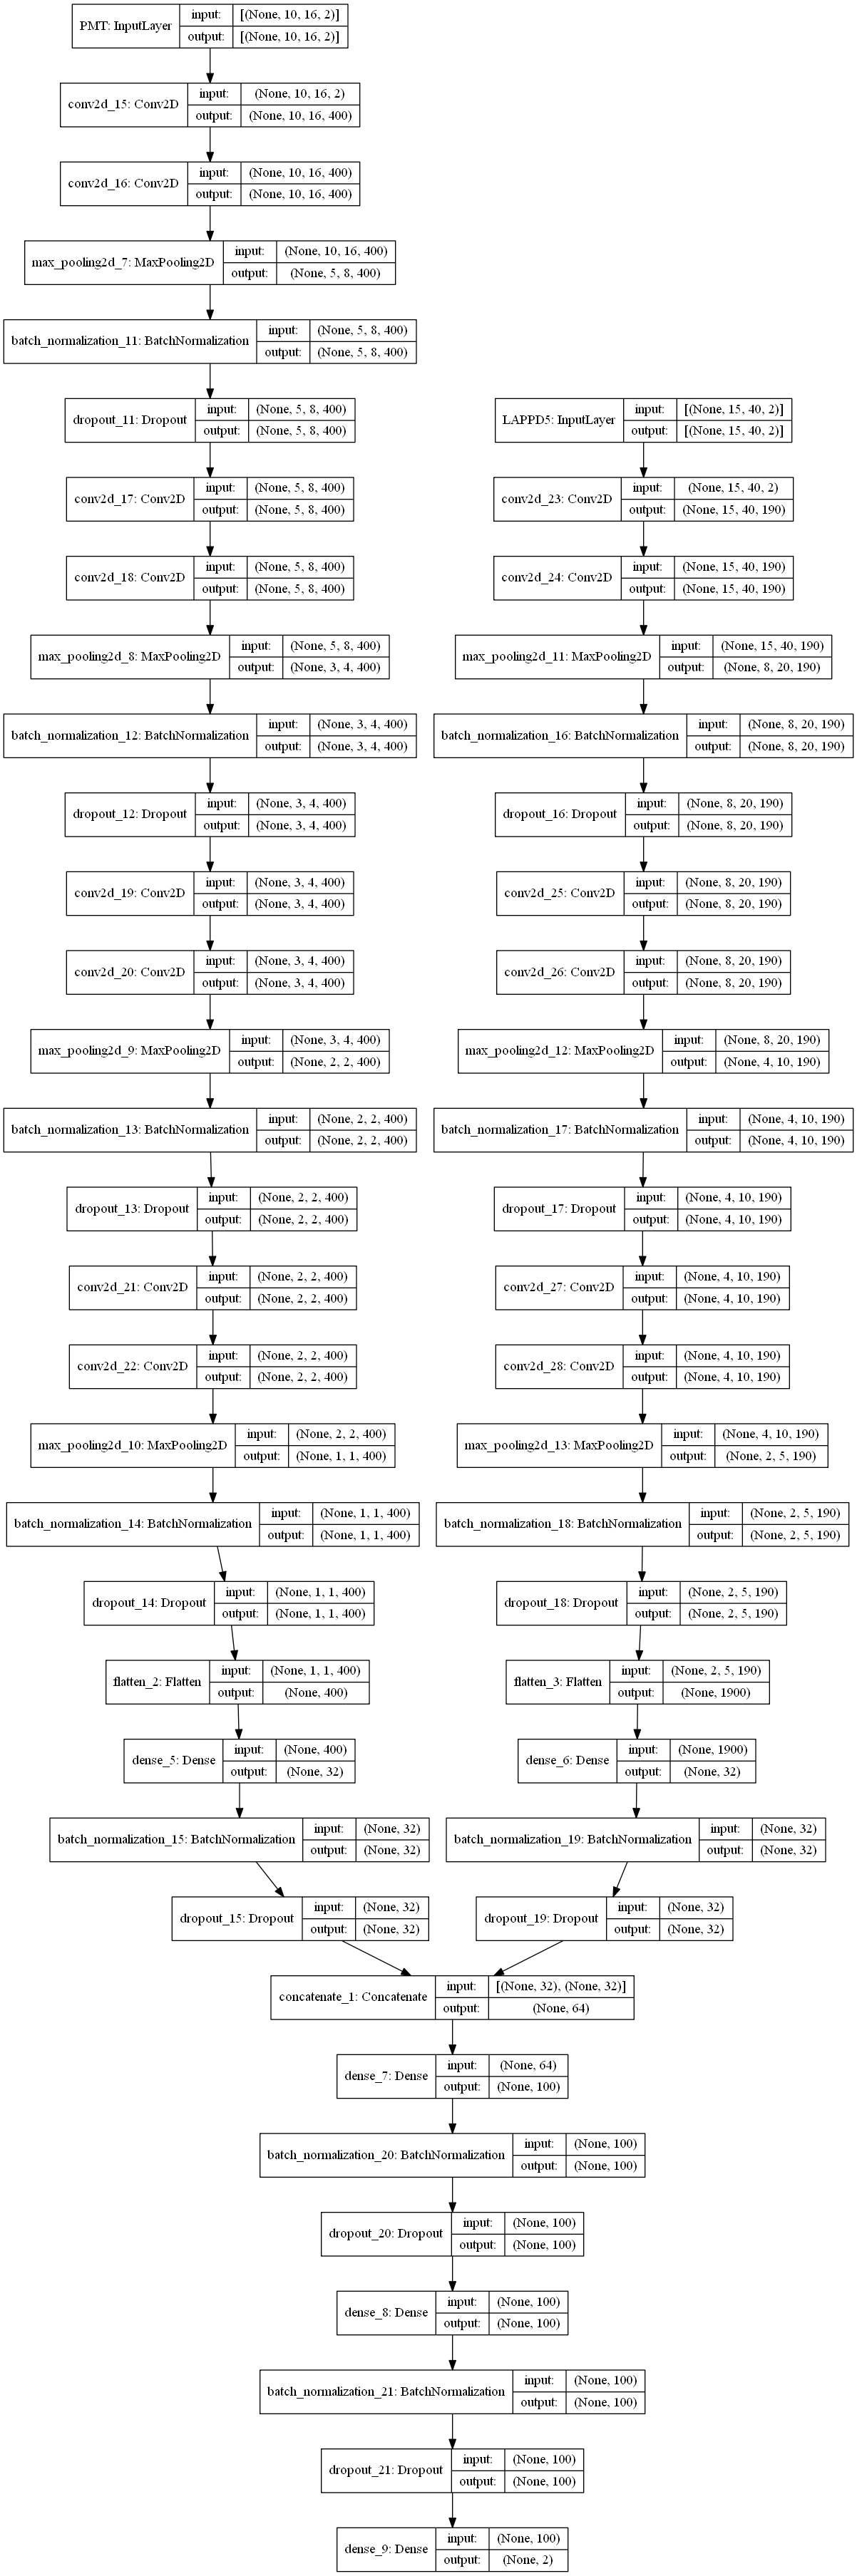

In [23]:
keras.utils.plot_model(model, 'API_MRD+Det_0.94 sep 5x5.png', show_shapes=True)

# LAPPD 1x1 + PMT

In [7]:


NAME ="PMT+LAPPD1x1_seperated"

tensorboard = TensorBoard(log_dir = 'logs\Final\{}'.format(NAME))


inputPMT = tf.keras.Input(shape=XTrainingPMT.shape[1:], name='PMT')
inputLAPPD1 = tf.keras.Input(shape=XTrainingLAPPD1.shape[1:], name='LAPPD5')
#inputMRD = tf.keras.Input(shape=(6), name='MRD')


x = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(inputPMT)
x = layers.Conv2D(130, kernel_size=(5,5),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.Conv2D(130, kernel_size=(3,3),activation ='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)

x= layers.Dense(512, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)

x= layers.Dense(512, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)

x = layers.Dense(32, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
xP = layers.Dropout(0.2)(x)


#mrd = layers.Dense(6, activation='sigmoid')(inputMRD)
#mrd =layers.Flatten()(mrd)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(inputLAPPD1)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)

xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)

xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.Conv2D(190, kernel_size=(2,2),activation ='relu',padding='same')(xL)
xL = layers.MaxPooling2D(2,padding='same')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)



xL = layers.Flatten()(xL)

xL = layers.Dense(512, activation='sigmoid')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)

xL = layers.Dense(32, activation='sigmoid')(xL)
xL = layers.BatchNormalization()(xL)
xL = layers.Dropout(0.2)(xL)




x = layers.concatenate([xP, xL]) #38




x= layers.Dense(100, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)

x= layers.Dense(100, activation='sigmoid')(x)
x= layers.BatchNormalization()(x)
x= layers.Dropout(0.2) (x)


outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs=[inputPMT, inputLAPPD1], outputs=[outputs], name='Model')
model.summary()




W0714 00:31:27.318342  3904 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PMT (InputLayer)                [(None, 10, 16, 2)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 10, 16, 130)  6630        PMT[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 10, 16, 130)  422630      conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 5, 8, 130)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [8]:


#Model compile
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])


#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="API-PMT+LAPPD_tf_1x1-improvement-val-acc_alternativeTest_{val_acc:.2f}.model" 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model Fit


Train on 85000 samples, validate on 20000 samples
Epoch 1/50
84800/85000 [============================>.] - ETA: 0s - loss: 0.4239 - acc: 0.8108
Epoch 00001: val_acc improved from -inf to 0.87215, saving model to API-PMT+LAPPD_tf_1x1-improvement-val-acc_alternativeTest_0.87.model
85000/85000 [==============================] - 25s 297us/sample - loss: 0.4236 - acc: 0.8110 - val_loss: 0.3099 - val_acc: 0.8722
Epoch 2/50
84800/85000 [============================>.] - ETA: 0s - loss: 0.2787 - acc: 0.8834
Epoch 00002: val_acc did not improve from 0.87215
85000/85000 [==============================] - 19s 228us/sample - loss: 0.2789 - acc: 0.8833 - val_loss: 0.6191 - val_acc: 0.7949
Epoch 3/50
84700/85000 [============================>.] - ETA: 0s - loss: 0.2420 - acc: 0.9003
Epoch 00003: val_acc did not improve from 0.87215
85000/85000 [==============================] - 19s 229us/sample - loss: 0.2420 - acc: 0.9003 - val_loss: 0.4700 - val_acc: 0.8125
Epoch 4/50
84900/85000 [===============

84700/85000 [============================>.] - ETA: 0s - loss: 0.0949 - acc: 0.9637
Epoch 00028: val_acc did not improve from 0.92975
85000/85000 [==============================] - 19s 226us/sample - loss: 0.0950 - acc: 0.9636 - val_loss: 0.2165 - val_acc: 0.9254
Epoch 29/50
84700/85000 [============================>.] - ETA: 0s - loss: 0.0903 - acc: 0.9659
Epoch 00029: val_acc did not improve from 0.92975
85000/85000 [==============================] - 19s 226us/sample - loss: 0.0902 - acc: 0.9659 - val_loss: 0.2575 - val_acc: 0.9238
Epoch 30/50
84900/85000 [============================>.] - ETA: 0s - loss: 0.0884 - acc: 0.9668
Epoch 00030: val_acc did not improve from 0.92975
85000/85000 [==============================] - 19s 225us/sample - loss: 0.0883 - acc: 0.9669 - val_loss: 0.2109 - val_acc: 0.9233
Epoch 31/50
84900/85000 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9652
Epoch 00031: val_acc did not improve from 0.92975
85000/85000 [=========================

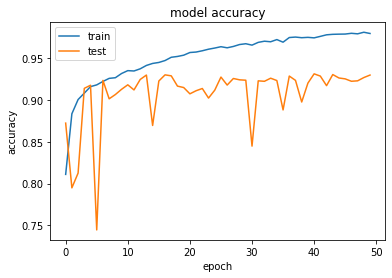

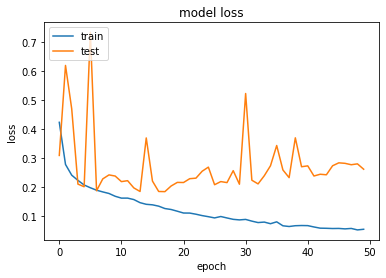

Ende des Versuchs: 


In [9]:

history = model.fit([XTrainingPMT,XTrainingLAPPD1],
                    YTraining,
                    batch_size=100,
                    #validation_split=0.2,
                    
                    validation_data=([XVal,XValLAPPD1],YVal),
                    epochs= 50,
                    
                    shuffle=True,
                    class_weight='balanced',
                    callbacks=[
                                #monitor,
                                checkpoint,
                                tensorboard 
                    ],
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [10]:
model = tf.keras.models.load_model("API-PMT+LAPPD_tf_1x1-improvement-val-acc_alternativeTest_0.93.model")

W0714 00:51:49.069325  3904 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0714 00:51:49.069325  3904 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0714 00:51:49.069325  3904 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [11]:
score = model.evaluate([XTest,XTestLAPPD1], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.29290418527009926
Test accuracy:  0.9284905


In [12]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTest,XTestLAPPD1], batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6876  744]
 [ 329 7056]]


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.9023622  0.0976378 ]
 [0.04454976 0.95545024]]


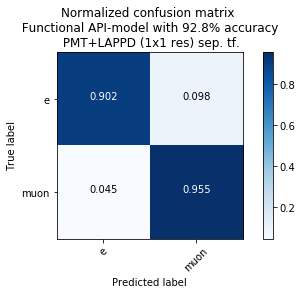

In [14]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Functional API-model with 92.8% accuracy \n PMT+LAPPD (1x1 res) sep. tf.')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [22]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


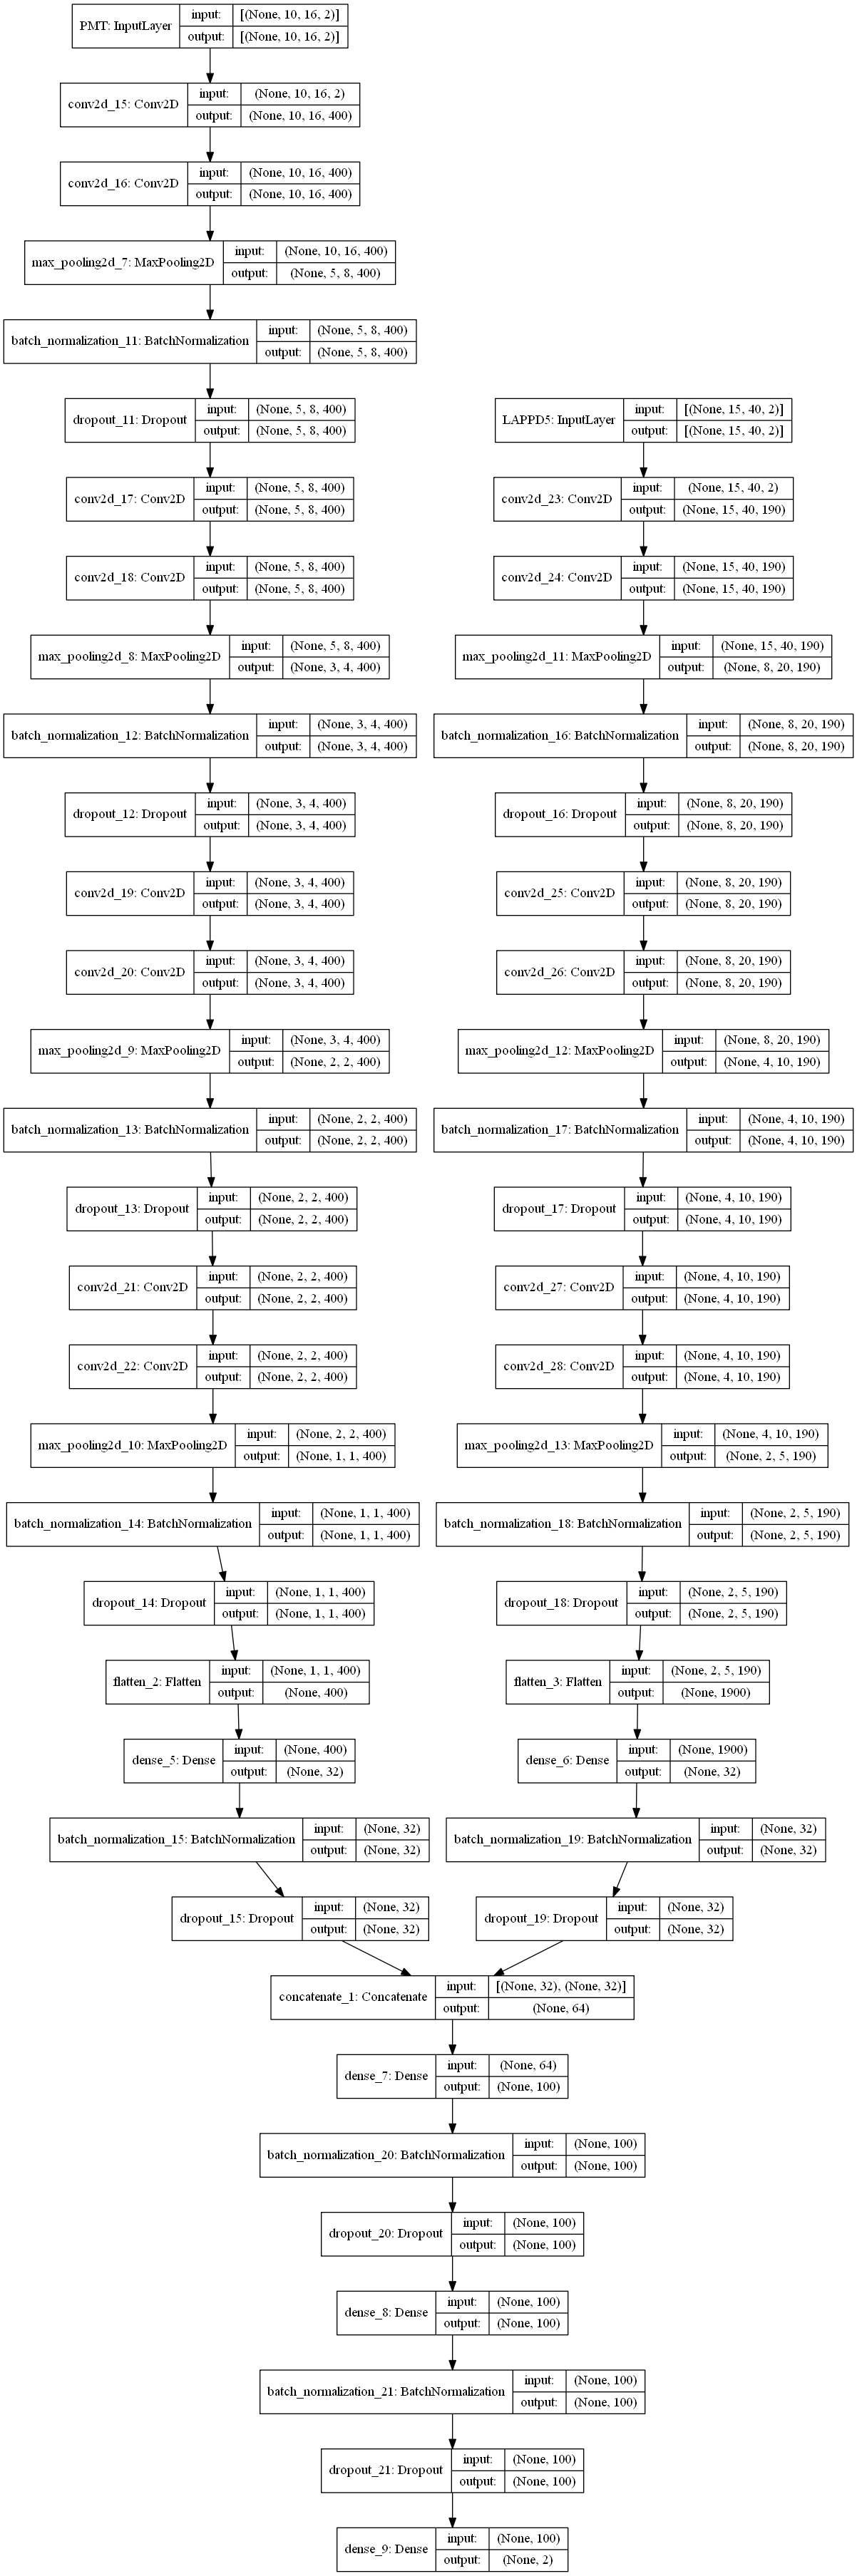

In [23]:
keras.utils.plot_model(model, 'API_MRD+Det_0.94 sep 5x5.png', show_shapes=True)

In [33]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[[2.79712e-02, 4.24601e-01],
         [0.00000e+00, 0.00000e+00],
         [0.00000e+00, 0.00000e+00],
         ...,
         [0.00000e+00, 0.00000e+00],
         [0.00000e+00, 0.00000e+00],
...

In [25]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6794  606]
 [ 352 7253]]


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91810811 0.08189189]
 [0.04628534 0.95371466]]


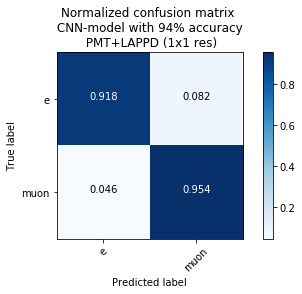

In [28]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94% accuracy \n PMT+LAPPD (1x1 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Does Charge learn better than Charge+Time?

In [21]:
XTrainingT= XTraining[:,:,:,1].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestT = XTest[:,:,:,1].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValT = XVal[:,:,:,1].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

XTrainingC= XTraining[:,:,:,0].reshape(XTraining.shape[0],XTraining.shape[1],XTraining.shape[2],1)
XTestC = XTest[:,:,:,0].reshape(XTest.shape[0],XTest.shape[1],XTest.shape[2],1)
XValC = XVal[:,:,:,0].reshape(XVal.shape[0],XVal.shape[1],XVal.shape[2],1)

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_339 (Conv2D)          (None, 10, 24, 160)       1600      
_________________________________________________________________
max_pooling2d_339 (MaxPoolin (None, 5, 12, 160)        0         
_________________________________________________________________
batch_normalization_562 (Bat (None, 5, 12, 160)        640       
_________________________________________________________________
dropout_562 (Dropout)        (None, 5, 12, 160)        0         
_________________________________________________________________
conv2d_340 (Conv2D)          (None, 5, 12, 160)        230560    
_________________________________________________________________
max_pooling2d_340 (MaxPoolin (None, 3, 6, 160)         0         
_________________________________________________________________
batch_normalization_563 (Bat (None, 3, 6, 160)      

Epoch 16/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1461 - acc: 0.9408
Epoch 00016: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 300us/sample - loss: 0.1461 - acc: 0.9408 - val_loss: 0.2501 - val_acc: 0.8924
Epoch 17/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1418 - acc: 0.9414
Epoch 00017: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 299us/sample - loss: 0.1417 - acc: 0.9415 - val_loss: 0.2068 - val_acc: 0.9194
Epoch 18/38
84800/85000 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9437
Epoch 00018: val_acc did not improve from 0.92680
85000/85000 [==============================] - 25s 296us/sample - loss: 0.1375 - acc: 0.9437 - val_loss: 0.2242 - val_acc: 0.9023
Epoch 19/38
84900/85000 [============================>.] - ETA: 0s - loss: 0.1351 - acc: 0.9445
Epoch 00019: val_acc did not improve from 0.92680
85000/85000 [=============

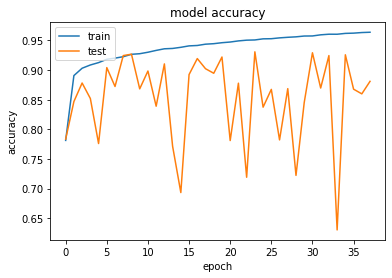

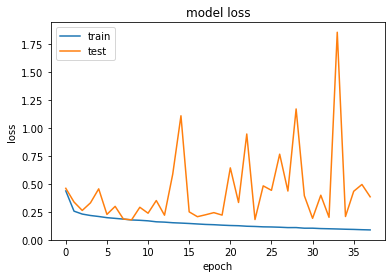

Ende des Versuchs: 


In [22]:
dense_layers = [3]
layer_sizes = [160]
conv_layers = [3]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_Charge_PMT+LAPPD(1x1)_PID_120k_V3-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTrainingC,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XValC,Yval)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

# Evaluate

In [72]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

(4552, 10, 16, 2)

In [74]:

print(XTest.shape,YTest.shape)
for sample in YTest[:20]:
    print(sample)

(4052, 10, 16, 2) (4052, 2)
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]


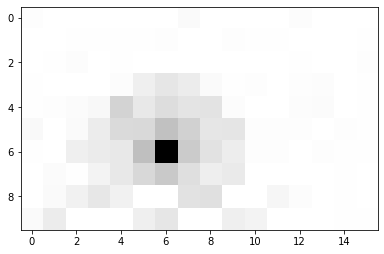

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

In [76]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2208471007696615
Test accuracy:  0.9163376


# Confusion matrix


In [77]:

prediction = model.predict(XTest)
print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


(4052, 2) (4052, 2)
[[1900  185]
 [ 154 1813]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.91127098 0.08872902]
 [0.07829181 0.92170819]]


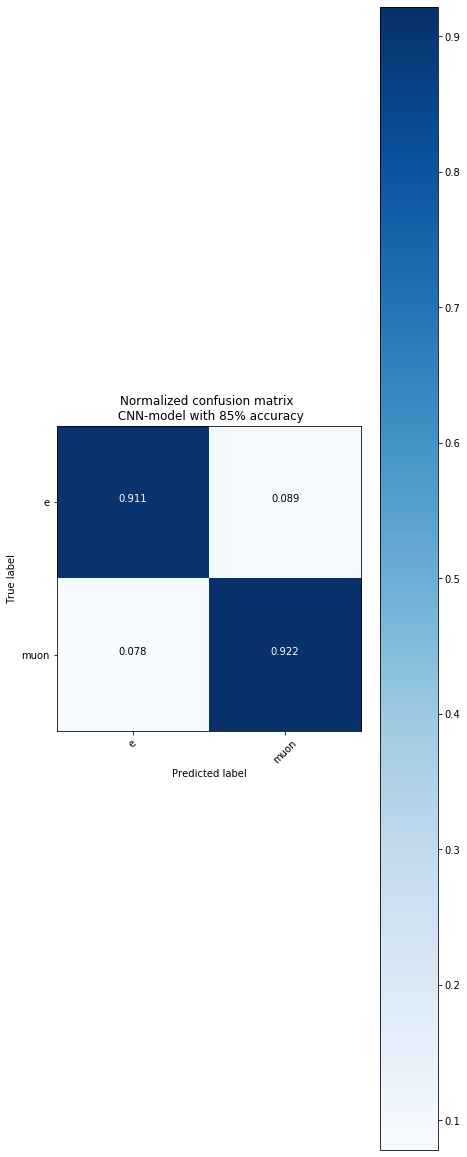

In [79]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 85% accuracy')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [50]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


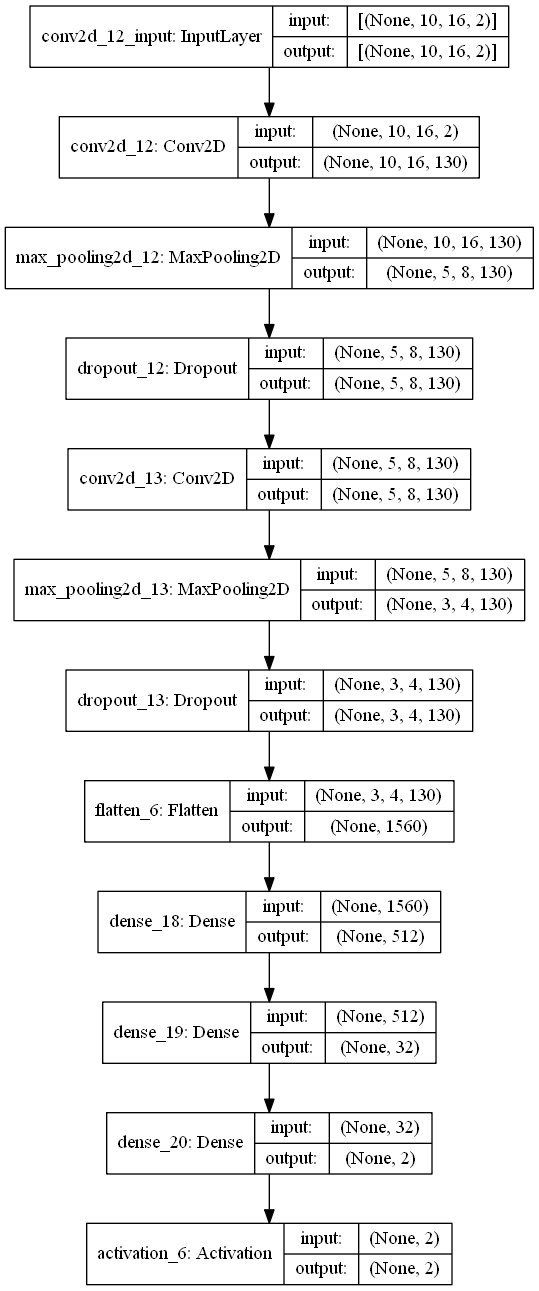

In [51]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


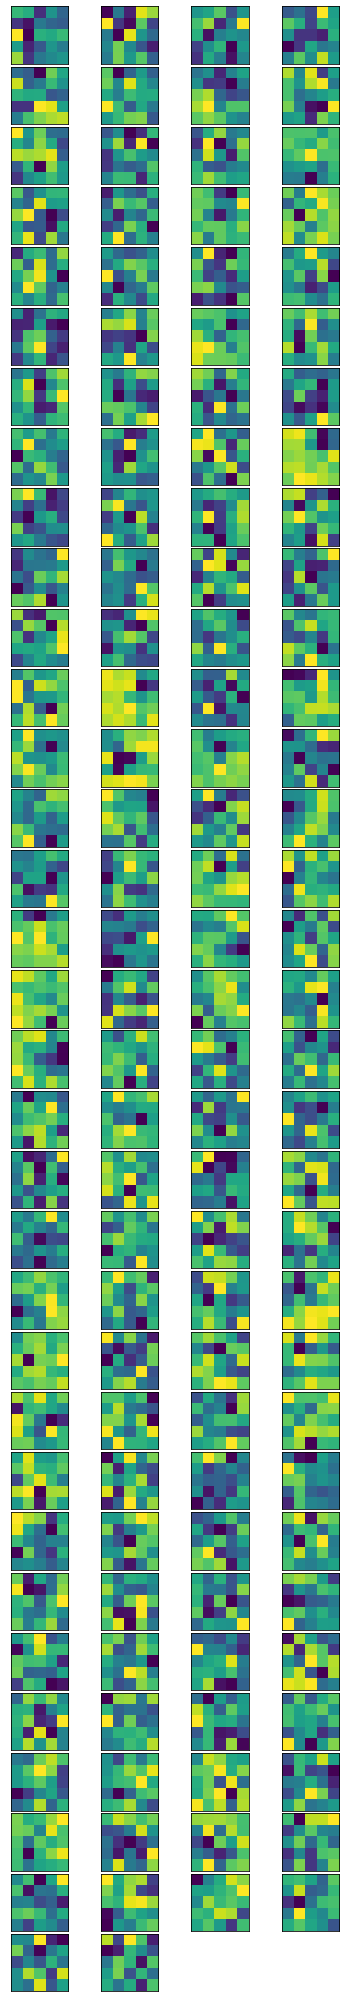

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


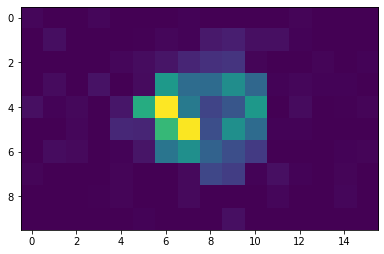

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

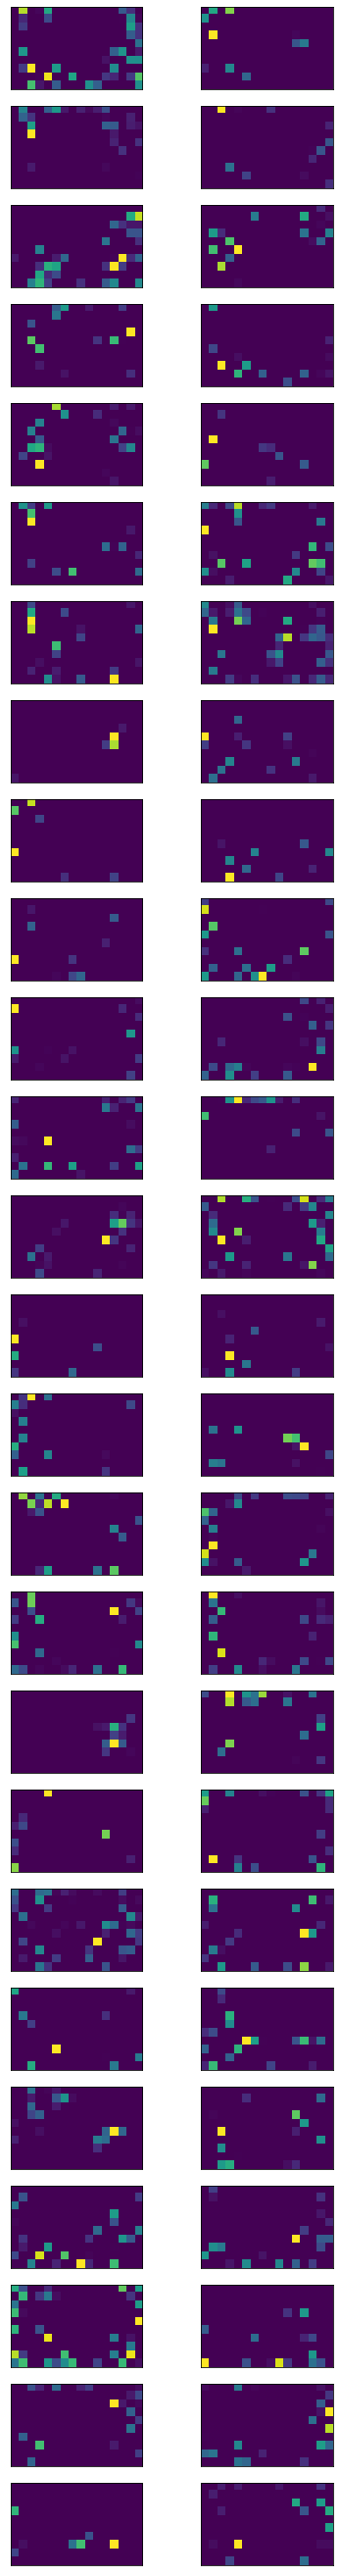

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
